In [214]:
import pandas as pd
import numpy as np

In [215]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [216]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [217]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [218]:
# df = pd.concat([tmp, tmp_2])

In [219]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [220]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [221]:
# male_df = df[df['Gender'] == 'Male']

In [222]:
# female_df = df[df['Gender'] == 'Female']

In [223]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [224]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [225]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

In [226]:
print(len(X_train))
print(len(y_train))

222
222


In [227]:
y_train

,Personality (Class label)
61,serious
27,dependable
154,responsible
40,responsible
224,serious
...,...
34,serious
189,serious
18,serious
122,responsible


In [228]:
tmp = X_train 
tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

tmp_2 = X_test 
tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

print(len(tmp))
print(len(tmp_2))
tmp = pd.concat([tmp, tmp_2])
tmp

222
96


,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism,Personality (Class label)
61,6,26,4,6,6,4,serious
27,6,22,4,2,6,8,dependable
154,6,19,7,4,5,5,responsible
40,5,18,1,6,2,4,responsible
224,5,23,5,6,4,4,serious
...,...,...,...,...,...,...,...
80,6,20,5,7,6,4,serious
286,6,18,5,7,6,6,serious
282,6,17,5,5,5,5,responsible
265,5,20,3,3,4,5,serious


In [229]:
class_counts = tmp['Personality (Class label)'].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()

balanced_df = pd.concat([
    tmp[tmp['Personality (Class label)'] == min_class],
    tmp[tmp['Personality (Class label)'] != min_class].sample(min_count)
], axis=0)

balanced_df

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism,Personality (Class label)
27,6,22,4,2,6,8,dependable
108,7,18,6,7,3,2,dependable
263,6,22,4,2,4,2,dependable
134,6,19,4,7,4,7,dependable
90,4,24,6,4,5,4,dependable
108,7,18,6,7,3,2,dependable
263,6,22,4,2,4,2,dependable
219,6,21,5,7,4,7,dependable
134,6,19,4,7,4,7,dependable
90,4,24,6,4,5,4,dependable


In [230]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [231]:
tmp_y

61         serious
27      dependable
154    responsible
40     responsible
224        serious
          ...     
80         serious
286        serious
282    responsible
265        serious
59         serious
Name: Personality (Class label), Length: 318, dtype: object

In [232]:
print(tmp_y.shape)
print(type(tmp_y))
tmp_y = tmp_y.to_frame()
tmp_y

(318,)
<class 'pandas.core.series.Series'>


,Personality (Class label)
61,serious
27,dependable
154,responsible
40,responsible
224,serious
...,...
80,serious
286,serious
282,responsible
265,serious


In [233]:
print(tmp_y.iloc[0])
print(tmp_y.iloc[1])

Personality (Class label)    serious
Name: 61, dtype: object
Personality (Class label)    dependable
Name: 27, dtype: object


In [234]:
# tmp_y

In [235]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
313,0.0,0.0,0.0,0.0,1.0
314,0.0,0.0,0.0,0.0,1.0
315,0.0,0.0,0.0,1.0,0.0
316,0.0,0.0,0.0,0.0,1.0


In [236]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
313,0.0,0.0,0.0,0.0,1.0
314,0.0,0.0,0.0,0.0,1.0
315,0.0,0.0,0.0,1.0,0.0
316,0.0,0.0,0.0,0.0,1.0


In [237]:
# help(sm.fit_resample)
tmp_X.columns

Index(['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness',
       'neuroticism', 'Personality (Class label)'],
      dtype='object')

In [238]:
# np.ravel(tmp_y_enc)
# tmp_X
# type(tmp_X)
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)
tmp_X

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
61,6,26,4,6,6,4
27,6,22,4,2,6,8
154,6,19,7,4,5,5
40,5,18,1,6,2,4
224,5,23,5,6,4,4
...,...,...,...,...,...,...
80,6,20,5,7,6,4
286,6,18,5,7,6,6
282,6,17,5,5,5,5
265,5,20,3,3,4,5


In [239]:
print(len(tmp_X))
print(len(tmp_y_enc)*5)

318
1590


In [240]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [241]:
tmp_y = tmp_X['Personality (Class label)']
tmp_y = pd.DataFrame({'Personality (Class label)': tmp_y})
type(tmp_y)
tmp_y

,Personality (Class label)
61,serious
27,dependable
154,responsible
40,responsible
224,serious
...,...
80,serious
286,serious
282,responsible
265,serious


In [242]:
# np.array(tmp_y.values.tolist())

In [243]:
# Eita lage nai eikhane
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the column you want to encode
encoder.fit(tmp_y)

# Transform the column
# df['A'] = 
encoder.transform(tmp_y)[:10]

# View the resulting dataframe
# print(df)

array([[4.],
       [0.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.]])

In [244]:
encoder.inverse_transform(encoder.transform(tmp_y)[:10])

array([['serious'],
       ['dependable'],
       ['responsible'],
       ['responsible'],
       ['serious'],
       ['serious'],
       ['serious'],
       ['serious'],
       ['lively'],
       ['serious']], dtype=object)

In [245]:
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)

In [246]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(tmp_X, np.ravel(tmp_y))

df_res = pd.DataFrame(X_res)
df_res['Personality'] = y_res

df_res

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism,Personality
0,6,26,4,6,6,4,serious
1,6,22,4,2,6,8,dependable
2,6,19,7,4,5,5,responsible
3,5,18,1,6,2,4,responsible
4,5,23,5,6,4,4,serious
...,...,...,...,...,...,...,...
1015,6,20,7,3,5,5,responsible
1016,6,21,7,2,5,6,responsible
1017,4,18,1,5,2,4,responsible
1018,4,19,3,4,3,3,responsible


In [247]:
df_res['Personality'].value_counts()

serious        204
dependable     204
responsible    204
lively         204
extraverted    204
Name: Personality, dtype: int64

In [248]:
tmp_X = df_res.drop('Personality', axis=1)
tmp_X

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
0,6,26,4,6,6,4
1,6,22,4,2,6,8
2,6,19,7,4,5,5
3,5,18,1,6,2,4
4,5,23,5,6,4,4
...,...,...,...,...,...,...
1015,6,20,7,3,5,5
1016,6,21,7,2,5,6
1017,4,18,1,5,2,4
1018,4,19,3,4,3,3


In [249]:
tmp_y = df_res['Personality']
tmp_y = pd.DataFrame({'Personality': tmp_y})
type(tmp_y)
tmp_y

,Personality
0,serious
1,dependable
2,responsible
3,responsible
4,serious
...,...
1015,responsible
1016,responsible
1017,responsible
1018,responsible


In [250]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [251]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [252]:
encoder.inverse_transform(tmp_y_enc)

array([['serious'],
       ['dependable'],
       ['responsible'],
       ...,
       ['responsible'],
       ['responsible'],
       ['responsible']], dtype=object)

In [253]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y_enc,
                                                        stratify=tmp_y_enc, 
                                                        test_size=0.30)

In [254]:
X_train

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
232,6,20,5,3,7,1
541,6,23,3,5,4,7
941,4,21,7,4,4,3
981,6,18,6,4,5,5
166,5,21,5,2,7,5
...,...,...,...,...,...,...
81,7,19,5,4,4,7
733,5,22,3,7,3,4
557,6,25,5,5,6,6
675,6,20,4,5,4,1


In [255]:
y_train

,dependable,extraverted,lively,responsible,serious
232,0.0,0.0,0.0,0.0,1.0
541,0.0,1.0,0.0,0.0,0.0
941,0.0,0.0,0.0,1.0,0.0
981,0.0,0.0,0.0,1.0,0.0
166,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
81,0.0,1.0,0.0,0.0,0.0
733,0.0,0.0,1.0,0.0,0.0
557,0.0,1.0,0.0,0.0,0.0
675,0.0,0.0,1.0,0.0,0.0


In [369]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y,
                                                        stratify=tmp_y, 
                                                        test_size=0.30)

In [316]:
X_train

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
862,3,18,2,4,4,4
584,5,18,4,5,3,6
281,3,17,5,1,5,7
572,6,25,6,4,6,7
392,5,19,4,5,4,6
...,...,...,...,...,...,...
376,5,19,4,3,6,5
195,5,21,6,5,6,8
194,7,19,5,1,6,2
939,6,17,5,4,5,5


In [317]:
y_train

,Personality
862,responsible
584,extraverted
281,extraverted
572,extraverted
392,dependable
...,...
376,dependable
195,extraverted
194,serious
939,responsible


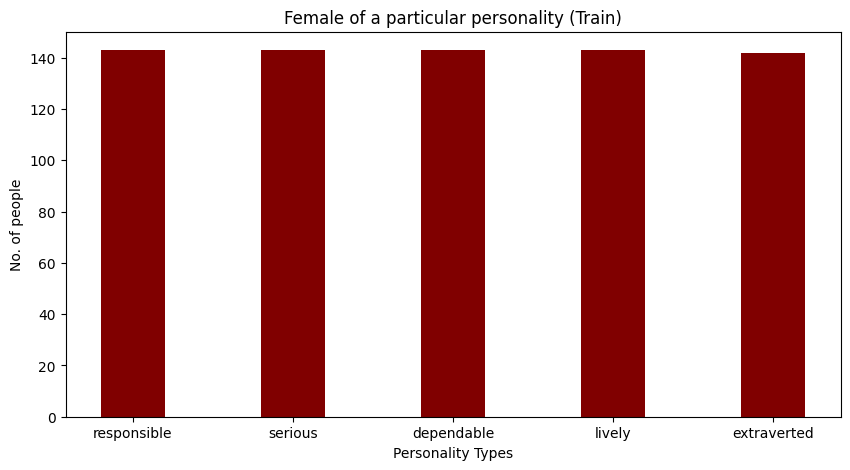

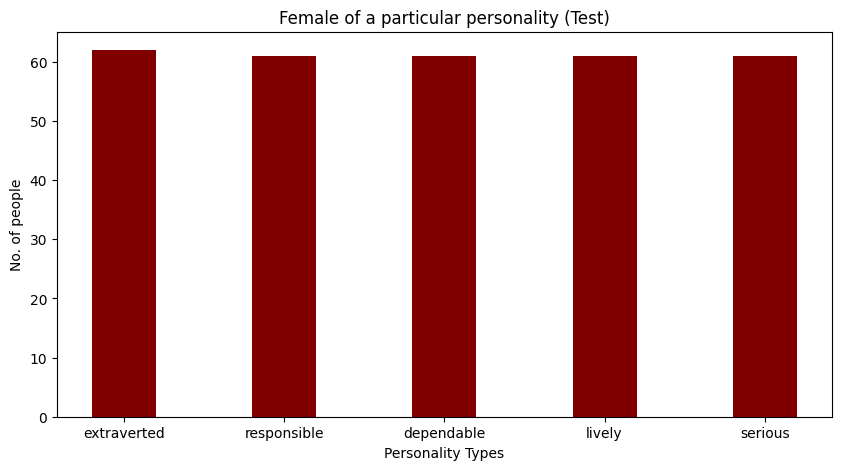

In [259]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality'].value_counts()._get_axis(axis=0)),
                list(i['Personality'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [260]:
X_train

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
1012,3,19,3,3,4,4
116,7,25,5,5,5,2
167,5,19,6,5,6,5
404,4,23,5,3,4,3
975,3,20,3,3,4,6
...,...,...,...,...,...,...
464,6,22,4,2,6,8
192,6,17,6,2,5,6
156,4,19,3,6,4,4
623,7,19,5,4,3,6


In [261]:
y_train

,Personality
1012,responsible
116,serious
167,serious
404,dependable
975,responsible
...,...
464,dependable
192,extraverted
156,serious
623,extraverted


In [262]:
y_train.iloc[0]

Personality    responsible
Name: 1012, dtype: object

In [263]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_train)

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
709,1.0,0.0,0.0,0.0,0.0
710,0.0,1.0,0.0,0.0,0.0
711,0.0,0.0,0.0,0.0,1.0
712,0.0,1.0,0.0,0.0,0.0


In [264]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [265]:
y_train

,Personality
1012,responsible
116,serious
167,serious
404,dependable
975,responsible
...,...
464,dependable
192,extraverted
156,serious
623,extraverted


In [266]:
# y_train = one_hot_encode(y_train)

In [267]:
# y_test = one_hot_encode(y_test)

In [268]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

# X.isna().sum()

In [269]:
# y['Personality (Class label)']

In [270]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y_train)

In [271]:
# X_train   # I am now here 

In [272]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

In [273]:
print(len(X_train))
print(len(X_test))
print(len(pd.concat([X_train, X_test])))

714
306
1020


In [274]:
print(len(y_train))
print(len(y_test))
print(len(pd.concat([y_train, y_test])))

714
306
1020


In [275]:
# y_train
# y_pred
type(y_train)

pandas.core.frame.DataFrame

In [276]:
X_train

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
1012,3,19,3,3,4,4
116,7,25,5,5,5,2
167,5,19,6,5,6,5
404,4,23,5,3,4,3
975,3,20,3,3,4,6
...,...,...,...,...,...,...
464,6,22,4,2,6,8
192,6,17,6,2,5,6
156,4,19,3,6,4,4
623,7,19,5,4,3,6


In [277]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

# y = pd.concat([y_train, y_test])

# Convert y_train to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [278]:
print(len(y_train_encoded))
print(len(y_test_encoded))

714
306


In [279]:

# Split the data into training and validation sets
# x_train, x_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=(6,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model on the test set
# y_test_encoded = le.transform(y_test)
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
23/23 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 0.1961 - val_loss: 0.0000e+00 - val_accuracy: 0.2026
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.1989 - val_loss: 0.0000e+00 - val_accuracy: 0.2026
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.1989 - val_loss: 0.0000e+00 - val_accuracy: 0.2026
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.1989 - val_loss: 0.0000e+00 - val_accuracy: 0.2026
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.1989 - val_loss: 0.0000e+00 - val_accuracy: 0.2026
Epoch 6/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.1989 - val_loss: 0.0000e+00 - val_accuracy: 0.2026
Epoch 7/10
23/23 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.1989 - v

In [280]:
model.evaluate(X_test, y_test_encoded)

10/10 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2026


[0.0, 0.20261438190937042]

In [281]:
X_test

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
978,4,19,4,2,5,2
970,5,19,6,3,6,5
126,4,24,6,4,5,4
414,2,18,6,7,3,5
51,4,24,6,4,5,4
...,...,...,...,...,...,...
695,6,18,2,7,4,6
585,7,19,5,4,3,6
696,6,17,4,5,5,1
804,5,18,3,6,6,1


In [299]:
# Chat GPT
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features in your input data
n_features = X_train.shape[1]

# Define the number of classes in your output
n_classes = len(y_train['Personality'].unique())

print(n_classes)
print(n_features)

5
6


In [300]:
# Define your model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [327]:
# Convert the 'Personality' column to category type
y_train_categorized = y_train['Personality'].astype('category')
y_test_categorized = y_test['Personality'].astype('category')

In [328]:
# y_train
len(y_test_categorized.cat.categories)

5

In [329]:
y_test_categorized

729         lively
822         lively
243    extraverted
533    extraverted
257    responsible
          ...     
515    extraverted
448     dependable
78         serious
314        serious
652    extraverted
Name: Personality, Length: 306, dtype: category
Categories (5, object): ['dependable', 'extraverted', 'lively', 'responsible', 'serious']

In [330]:
y_test_categorized.cat.codes

729    2
822    2
243    1
533    1
257    3
      ..
515    1
448    0
78     4
314    4
652    1
Length: 306, dtype: int8

In [331]:
# Convert your labels to one-hot encoding
y_train_categorized_en = tf.keras.utils.to_categorical(y_train_categorized.cat.codes, num_classes=n_classes)
y_test_categorized_en = tf.keras.utils.to_categorical(y_test_categorized.cat.codes, num_classes=n_classes)

print(len(y_train_categorized_en))
print(len(y_test_categorized_en))
print(y_train_categorized_en[0])

714
306
[0. 0. 0. 1. 0.]


In [334]:
# Train the model
model.fit(X_train, y_train_categorized_en, epochs=100, batch_size=32, validation_split=0.1, 
          verbose=0)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_categorized_en, batch_size=32)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10/10 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9444
Test loss: 0.1573231816291809
Test accuracy: 0.9444444179534912


In [335]:
# Create a Pandas DataFrame with a single row for your input data
tmp_data = pd.DataFrame([[1, 2, 3, 4, 5, 6]], columns=['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness', 'neuroticism'])

In [337]:
# Get the predicted probabilities for each category
probas = model.predict(tmp_data)

# Print the predicted probabilities
print(probas)

1/1 [==============================] - 0s 168ms/step
[[2.1298533e-07 9.9516690e-01 6.4093055e-09 3.2382243e-07 4.8325434e-03]]


In [341]:
# Get the index of the category with the highest probability
pred_idx = probas.argmax()

# Get the category name from the index
categories = y_train_categorized.cat.categories
pred_category = categories[pred_idx]

# Print the predicted category
print(pred_category)

extraverted


In [349]:
# 
y_train["Personality"][862]

'responsible'

In [350]:
# Create a Pandas DataFrame with a single row for your input data
tmp_data = pd.DataFrame([[3, 18, 2, 4, 4, 4]], columns=['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness', 'neuroticism'])

# Get the predicted probabilities for each category
probas = model.predict(tmp_data)

# Print the predicted probabilities
print(probas)

# Get the index of the category with the highest probability
pred_idx = probas.argmax()

# Get the category name from the index
categories = y_train_categorized.cat.categories
pred_category = categories[pred_idx]

# Print the predicted category
print(pred_category)

1/1 [==============================] - 0s 29ms/step
[[1.18375346e-20 6.15897734e-05 4.29691689e-04 9.99377668e-01
  1.31066612e-04]]
responsible


In [354]:
# y_train

In [367]:
# Bard Chat
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_test_en = le.transform(y_test)


# Encode the categorical data
# classes = set(y_train)
# num_classes = len(classes)

# y_train_en_cat = tf.keras.utils.to_categorical(y_train_en)
# y_test_en_cat = tf.keras.utils.to_categorical(y_test_en)

# y_train_en_cat = tf.keras.utils.to_categorical(y_train_en.astype('category'))
# y_test_en_cat = tf.keras.utils.to_categorical(y_test_en.astype('category'))

y_train_en_cat = tf.keras.utils.to_categorical(y_train_en.astype('str'))
y_test_en_cat = tf.keras.utils.to_categorical(y_test_en.astype('str'))

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [370]:
# # Bard Failed
# # Create the model
# model = keras.Sequential([
#   keras.layers.Dense(128, activation='relu'),
#   keras.layers.Dense(64, activation='relu'),
#   keras.layers.Dense(5, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train_en, epochs=10)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test_en)
# print('Loss:', loss)
# print('Accuracy:', accuracy)

# # Save the model
# # model.save('personality_model.h5')

In [ ]:
# Bing Chat

In [374]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder on the training data
le.fit(y_train['Personality'])

# Transform the training and test data
y_train_en = le.transform(y_train['Personality'])
y_test_en = le.transform(y_test['Personality'])

In [375]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#

In [376]:
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
18/18 [==============================] - 1s 19ms/step - loss: 1.6477 - accuracy: 0.3152 - val_loss: 1.5352 - val_accuracy: 0.3147
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.4330 - accuracy: 0.3835 - val_loss: 1.3008 - val_accuracy: 0.5315
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 1.3491 - accuracy: 0.4588 - val_loss: 1.3089 - val_accuracy: 0.4825
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 1.3120 - accuracy: 0.4431 - val_loss: 1.2032 - val_accuracy: 0.5874
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 1.2334 - accuracy: 0.4956 - val_loss: 1.1512 - val_accuracy: 0.6224
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 1.2153 - accuracy: 0.4991 - val_loss: 1.1913 - val_accuracy: 0.5594
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1928 - accuracy: 0.5236 - val_loss: 1.2286 - val_accuracy: 0.5524
Epoch 8/10
18/18 [=

In [378]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

# Print classification report and confusion matrix
print(classification_report(y_test_cat, y_pred_cat))
print(confusion_matrix(y_test_cat, y_pred_cat))

10/10 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

  dependable       0.40      0.67      0.50        61
 extraverted       0.70      0.74      0.72        61
      lively       0.60      0.90      0.72        62
 responsible       0.80      0.07      0.12        61
     serious       0.63      0.43      0.51        61

    accuracy                           0.56       306
   macro avg       0.63      0.56      0.51       306
weighted avg       0.63      0.56      0.52       306

[[41  8  1  0 11]
 [12 45  4  0  0]
 [ 3  3 56  0  0]
 [27  6 20  4  4]
 [19  2 13  1 26]]


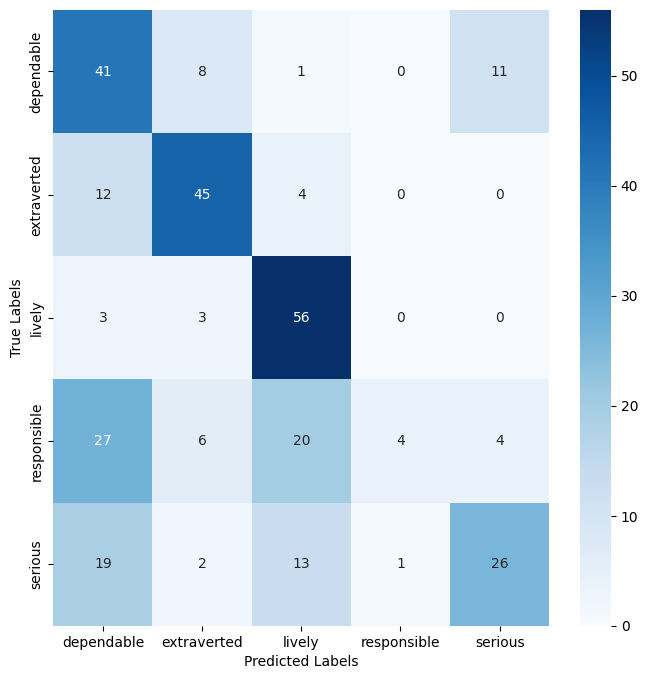

In [380]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create the confusion matrix
# conf_mat = confusion_matrix(y_test_cat, y_pred_cat)

# # Plot the confusion matrix
# plt.figure(figsize=(8,8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [381]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_cat = np.argmax(y_pred, axis=1)

# Convert the encoded test labels back to original labels
y_test_orig = le.inverse_transform(y_test_en)

# Convert the predicted labels back to original labels
y_pred_orig = le.inverse_transform(y_pred_cat)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test_orig, y_pred_orig, average='weighted')
recall = recall_score(y_test_orig, y_pred_orig, average='weighted')
f1 = f1_score(y_test_orig, y_pred_orig, average='weighted')
accuracy = accuracy_score(y_test_orig, y_pred_orig)

# Print the evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

10/10 [==============================] - 0s 1ms/step
Precision: 0.6268932349188612
Recall: 0.5620915032679739
F1-score: 0.5150716198917104
Accuracy: 0.5620915032679739


In [395]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Get the model's predicted labels for the test set
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# y_pred = model.predict_classes(X_test)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test_en, y_pred)

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(le.classes_):
    print(f"Metrics for {class_name}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-score: {f1[i]:.2f}\n")

# Calculate micro-averaged precision, recall, and F1-score
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='micro')

# Print micro-averaged precision, recall, and F1-score
print("Micro-averaged metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1:.2f}\n")

# Calculate macro-averaged precision, recall, and F1-score
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='macro')

# Print macro-averaged precision, recall, and F1-score
print("Macro-averaged metrics:")
print(f"Precision: {macro_precision:.2f}")
print(f"Recall: {macro_recall:.2f}")
print(f"F1-score: {macro_f1:.2f}\n")


10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision: 0.40
Recall: 0.67
F1-score: 0.50

Metrics for extraverted:
Precision: 0.70
Recall: 0.74
F1-score: 0.72

Metrics for lively:
Precision: 0.60
Recall: 0.90
F1-score: 0.72

Metrics for responsible:
Precision: 0.80
Recall: 0.07
F1-score: 0.12

Metrics for serious:
Precision: 0.63
Recall: 0.43
F1-score: 0.51

Micro-averaged metrics:
Precision: 0.56
Recall: 0.56
F1-score: 0.56

Macro-averaged metrics:
Precision: 0.63
Recall: 0.56
F1-score: 0.51



In [409]:
from sklearn.metrics import cohen_kappa_score

y_pred = model.predict(X_test).argmax(axis=-1)
kappa = cohen_kappa_score(y_test_en, y_pred)
print("Cohen's kappa:", kappa)

10/10 [==============================] - 0s 1ms/step
Cohen's kappa: 0.45237459265986435


In [410]:
from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test).argmax(axis=-1)
mcc = matthews_corrcoef(y_test_en, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

10/10 [==============================] - 0s 1ms/step
Matthews Correlation Coefficient (MCC): 0.4725346666200967


In [412]:
import numpy as np

k = 3  # Top-K value
y_pred = model.predict(X_test)
top_k = np.sum(np.argsort(y_pred, axis=1)[:, -k:] == y_test_en.reshape(-1, 1), axis=1)
top_k_acc = np.mean(top_k)
print(f"Top-{k} Accuracy: {top_k_acc:.2f}")

10/10 [==============================] - 0s 1ms/step
Top-3 Accuracy: 0.92


In [282]:
len(y_test_encoded)

306

In [283]:
X_test.shape

(306, 6)

In [286]:
y_test_encoded.shape

(306,)

In [287]:
X_train

,openness,Age,extraversion,conscientiousness,agreeableness,neuroticism
1012,3,19,3,3,4,4
116,7,25,5,5,5,2
167,5,19,6,5,6,5
404,4,23,5,3,4,3
975,3,20,3,3,4,6
...,...,...,...,...,...,...
464,6,22,4,2,6,8
192,6,17,6,2,5,6
156,4,19,3,6,4,4
623,7,19,5,4,3,6


In [288]:
type(X_train)

pandas.core.frame.DataFrame

In [289]:
type(y_train)

pandas.core.frame.DataFrame

In [295]:
y_train['Personality'].unique()

array(['responsible', 'serious', 'dependable', 'extraverted', 'lively'],
      dtype=object)

In [377]:
714 + 306

1020